### Which MOEA is the Best ?

Algorithms to be considered
* PAES(1+1)
* PAES(1+|A|)
* SPEA 2
* NSGA 2
* MOEA/D (Chebychev , Weighted sum , Penalty Boundary Intersection)
* NSGA 3

Literature Review:
* papers on all these algorithms (Foundational Papers)
* Test Problems Definitions 
* Evaluation Metrics (Strongly Pareto Compliant and Weakly Pareto Compliant)

In [ ]:
# First Algorithm (1+1 PAES)

In [1]:
from pymoo.algorithms.moo.spea2 import SPEA2
from pymoo.optimize import minimize
from pymoo.problems.many.dtlz import DTLZ2

In [2]:

problem = DTLZ2(n_obj=2)
algorithm = SPEA2(pop_size=1000,save_history=True)
res_list = []
for i in range(10):
  res = minimize(problem,
                algorithm,
                ('n_gen', 100),
                seed=1,
                verbose=True,
                save_history=True)
  res_list.append(res)


Compiled modules for significant speedup can not be used!
https://pymoo.org/installation.html#installation

To disable this warning:
from pymoo.config import Config
Config.warnings['not_compiled'] = False

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |      igd+     |      gd+     
     1 |     1000 |     19 |  0.2058326926 |  0.3799262191 |  0.0215021093 |  0.1961436922 |  0.3799260989
     2 |     2000 |     21 |  0.1729621718 |  0.3285294068 |  0.0272785595 |  0.1690324446 |  0.3285292980
     3 |     3000 |     31 |  0.1484053237 |  0.2505695768 |  0.0582612708 |  0.1460061002 |  0.2505686960
     4 |     4000 |     25 |  0.1136766735 |  0.2283320940 |  0.0865081880 |  0.1045245157 |  0.2283286561
     5 |     5000 |     27 |  0.1044833065 |  0.1211066249 |  0.1113434029 |  0.0761670935 |  0.1211022436
     6 |     6000 |     45 |  0.0922605736 |  0.0962141273 |  0.1243863967 |  0.0654121642 |  0.0962061003
     7 |     7000 |     44 |  0.0632985690 |

KeyboardInterrupt: 

In [ ]:
import numpy as np
from pymoo.indicators.hv import HV
pareto_front = problem.pareto_front()
ref_point = np.array([10,10,10])
ind = HV(ref_point=ref_point)
print("HV of Pareto Front is {0} and HV of result is {1}".format(ind(pareto_front),ind(res.F)))

HV of Pareto Front is 999.4257689054328 and HV of result is 999.3867136153895


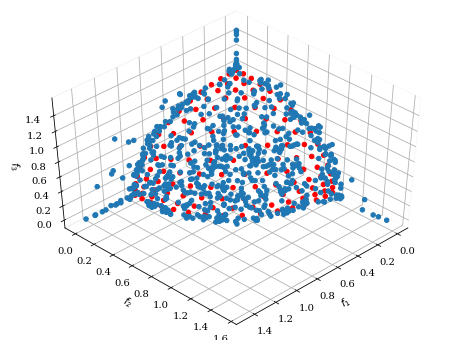

In [ ]:
from pymoo.visualization.scatter import Scatter
plot = Scatter()
plot.add(res.F)
plot.add(pareto_front,color="red")
plot.show()

In [ ]:
# next algorithm is NSGA2

In [ ]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems.many import DTLZ2
from pymoo.optimize import minimize
problem = DTLZ2(n_obj=3)
algorithm = NSGA2(pop_size=1000,save_history=True)
res = minimize(problem,
               algorithm,
               ('n_gen', 1000),
               seed=1,
               verbose=True)

n_gen  |  n_eval  | n_nds  |      igd      |       gd     
     1 |     1000 |    101 |  0.2604596049 |  0.4068028232
     2 |     2000 |    117 |  0.2472675116 |  0.3624707250
     3 |     3000 |    149 |  0.2174906424 |  0.3352469830
     4 |     4000 |    191 |  0.1932724644 |  0.2898230718
     5 |     5000 |    188 |  0.1583579512 |  0.2589313171
     6 |     6000 |    219 |  0.1378683578 |  0.2318969461
     7 |     7000 |    239 |  0.1151020468 |  0.2108050430
     8 |     8000 |    278 |  0.0991474705 |  0.1790484511
     9 |     9000 |    315 |  0.0855766194 |  0.1432045970
    10 |    10000 |    379 |  0.0763490764 |  0.1308543337
    11 |    11000 |    440 |  0.0667925782 |  0.1162281853
    12 |    12000 |    557 |  0.0581509031 |  0.0964016714
    13 |    13000 |    624 |  0.0510933295 |  0.0840998748
    14 |    14000 |    769 |  0.0456096163 |  0.0782456772
    15 |    15000 |    882 |  0.0415007350 |  0.0695983280
    16 |    16000 |   1000 |  0.0376178332 |  0.06344834

In [ ]:
from pymoo.algorithms.moo.moead import MOEAD
from pymoo.problems.many import DTLZ2
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.optimize import minimize
problem = DTLZ2(n_obj=3)
ref_dirs = get_reference_directions('energy',3,90,seed=1)
algorithm = MOEAD(ref_dirs=ref_dirs , n_neighbours=15)
res = minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=1,
               verbose=True)

n_gen  |  n_eval  | n_nds  |      igd      |       gd     
     1 |       90 |     39 |  0.4095432305 |  0.5026363267
     2 |      180 |     54 |  0.4104106923 |  0.4103148382
     3 |      270 |     67 |  0.3348048399 |  0.2793688612
     4 |      360 |     75 |  0.2776976919 |  0.2501979691
     5 |      450 |     74 |  0.2510362760 |  0.2155450236
     6 |      540 |     64 |  0.2228187227 |  0.1950438836
     7 |      630 |     60 |  0.1991188965 |  0.1744873939
     8 |      720 |     61 |  0.1909136860 |  0.1681599706
     9 |      810 |     69 |  0.1689632244 |  0.1561908858
    10 |      900 |     66 |  0.1547375252 |  0.1410503843
    11 |      990 |     66 |  0.1517455257 |  0.1432210331
    12 |     1080 |     65 |  0.1391023898 |  0.1317951113
    13 |     1170 |     66 |  0.1356242889 |  0.1335410794
    14 |     1260 |     71 |  0.1289668778 |  0.1218443472
    15 |     1350 |     75 |  0.1231195402 |  0.1209427910
    16 |     1440 |     71 |  0.1211095185 |  0.12035932